#Exercise

The dataset is about the image data of natural scenes around the world. This dataset size 150 x 150 distributed under 6 categories as follows:




0 - buildings




1 - forest




2 - glacier




3 - mountain




4 - sea




5 - street




The train and test are separated in each files. 




Conduct an analysis using an appropriate deep learning model. You are required to improve the performance of the model.

Dataset content:

zip file->seg_train,seg_test -> buildings,forest,glacier, mountain,sea,street


Solution Reference: https://www.tensorflow.org/tutorials/load_data/images

In [153]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [154]:
# First path in below cell - Your Google Drive location which you want to Unzip
# Second path in below cell - Path where you want to extract the zip file in Google Drive
import os.path
from os import path

extract_output_directory = '/drive/My Drive/apu-dl-datasets/nature'
if path.exists(extract_output_directory) == False:
  !unzip '/drive/My Drive/apu-dl-datasets/nature.zip' -d extract_output_directory
else:
  print('Path already exists')

Path already exists



Train and Test dataset
Each Image is 150 x 150 pixels.


In [155]:
import os
import cv2
import random
import keras

import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling, Dropout
from keras.utils import to_categorical

%matplotlib inline

In [156]:
DIRECTORY = '/drive/My Drive/apu-dl-datasets/nature/nature/seg_train/seg_train'
CATEGORIES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [157]:
data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)
  for img in os.listdir(path):
    img_path = os.path.join(path, img)
    label = CATEGORIES.index(category)
    # It specifies to load an image in grayscale mode. Can read a color image file in grayscale (black and white).
    arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(arr, (120,120))
    data.append([new_arr,label])

In [158]:
len(data)

2700

In [159]:
DIRECTORY2 = '/drive/My Drive/apu-dl-datasets/nature/nature/seg_test/seg_test'

In [160]:
data2 = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY2, category)
  for img in os.listdir(path):
    img_path = os.path.join(path, img)
    label = CATEGORIES.index(category)
    # It specifies to load an image in grayscale mode. Can read a color image file in grayscale (black and white).
    arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(arr, (120,120))
    data2.append([new_arr,label])

In [161]:
random.shuffle(data)

X_train = []
y_train = []

for features, label in data:
  X_train.append(features)
  y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train/255
X_train = X_train.reshape(-1,120,120,1)
X_train.shape

(2700, 120, 120, 1)

In [162]:
random.shuffle(data2)

X_test = []
y_test = []

for features, label in data:
  X_test.append(features)
  y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test/255
X_test = X_test.reshape(-1,120,120,1)
X_test.shape

(2700, 120, 120, 1)

In [163]:
# Step 2 Model
# 28,28,1. The 1 means non color image, just black and white. You have to change to 3 if it's a color image.

L1 = 30
L2 = 30
L3 = 60

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(120,120,1),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

In [164]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [165]:
history = model.fit(X_train,y_train,epochs=30,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/30
27/27 [==============================] - 77s 3s/step - loss: 1.7718 - accuracy: 0.2363 - val_loss: 1.5553 - val_accuracy: 0.3904
Epoch 2/30
27/27 [==============================] - 75s 3s/step - loss: 1.5838 - accuracy: 0.3785 - val_loss: 1.4290 - val_accuracy: 0.5007
Epoch 3/30
27/27 [==============================] - 77s 3s/step - loss: 1.4368 - accuracy: 0.4300 - val_loss: 1.2681 - val_accuracy: 0.5252
Epoch 4/30
27/27 [==============================] - 76s 3s/step - loss: 1.3521 - accuracy: 0.4581 - val_loss: 1.1724 - val_accuracy: 0.5544
Epoch 5/30
27/27 [==============================] - 76s 3s/step - loss: 1.2809 - accuracy: 0.4941 - val_loss: 1.1164 - val_accuracy: 0.5867
Epoch 6/30
27/27 [==============================] - 77s 3s/step - loss: 1.2083 - accuracy: 0.5148 - val_loss: 1.0341 - val_accuracy: 0.6067
Epoch 7/30
27/27 [==============================] - 77s 3s/step - loss: 1.1845 - accuracy: 0.5267 - val_loss: 1.0457 - val_accuracy: 0.6222
Epoch 8/30
27/27 [==

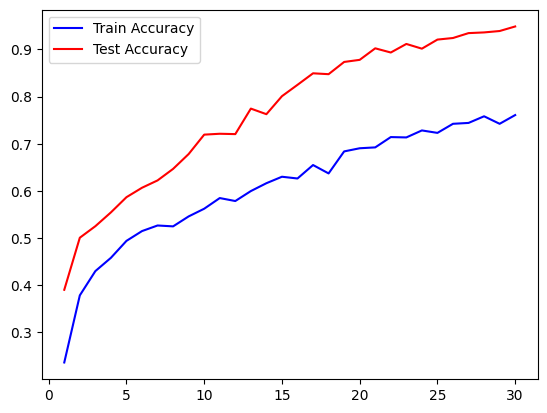

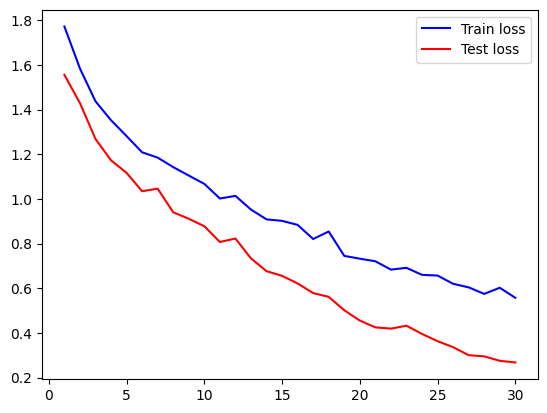

In [166]:
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()